# Lead Scoring Case Study

## Problem Statement:
X Education an education company who sells online courses to industry professionals, need to select the promising leads to increase their target lead conversion rate to 80%

DataSet: <b>Leads.csv</b>

Goal: Build a logistic regression model to assign a lead score to each of the leads

## Step 0] Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

import warnings
warnings.filterwarnings('ignore')

## Step 1] Data Exploration

### - Load Dataset

In [2]:
df = pd.read_csv('Leads.csv')

### - Exploring Leads Dataset

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df.columns.to_list()

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Null Values

In [8]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### - Current Conversion Rate

In [9]:
round(100*(df["Converted"].value_counts()[1]/df["Converted"].count()),2)

38.54

### - Inferences on Data Exploration
1] There are <b>9240</b> Records in total and <b>37</b> Attributes <br>
2] There <b>38.54%</b> Converted Leads <br>
3] There are 4 columns of type float64, 3 columns of type int64 and 30 columns of type object <br>
4] Highest Null value percent is for Lead Quality Column of about 51.59% and rest all are below that <br>

## Step 2] Data Cleaning

### - Handling Columns with "Select" value

In [10]:
categorical_columns = df.select_dtypes(include='object')
categorical_columns.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [11]:
select_search = lambda x: x.str.contains('Select', na=False)
col_list = categorical_columns.columns[categorical_columns.apply(select_search).any()].tolist()
print(f"Columns with Select value:\n{col_list}")

Columns with Select value:
['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


#### - Inference:
We can see that there are 4 Columns which have Select value in there data<br>
We can replace these Columns value with None Value

In [12]:
df[col_list]=df[col_list].replace('Select', np.NaN)

### - Dropping Columns with >40% Null values

In [13]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### - Inference
The below are the columns which can be dropped <br>

1] How did you hear about X Education - 78.46%<br>
2] Lead Quality - 51.59% <br>
3] Lead Profile - 74.19%<br>
4] Asymmetrique Activity Index  - 45.65% <br>
5] Asymmetrique Profile Index - 45.65% <br>
6] Asymmetrique Activity Score - 45.65% <br>
7] Asymmetrique Profile Score - 45.65%

But How did you hear about X Education is a good metric to be considered so the values can be categorized as Answered and Not Answered and consider the Column, so except for this rest 6 Columns can be dropped

In [14]:
print(f"Shape of df before Dropping {df.shape}")
df.drop(['Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1, inplace=True)
print(f"Shape of df after Dropping {df.shape}")

Shape of df before Dropping (9240, 37)
Shape of df after Dropping (9240, 31)


In [15]:
missing_percent = round(100*(df.isnull().sum()/len(df.index)), 2)
missing_percent

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### - Handling missing values

In [16]:
missing_value_cols = missing_percent[missing_percent > 0.0]
missing_value_cols

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
City                                             39.71
dtype: float64

#### - How did you hear about X Education

In [17]:
df["How did you hear about X Education"].value_counts(normalize=True, dropna=False)*100

NaN                      78.463203
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

In [18]:
df['How did you hear about X Education'] = np.where(df['How did you hear about X Education'].isnull(),'Not Answered','Answered' )

In [19]:
df["How did you hear about X Education"].value_counts(normalize=True, dropna=False)*100

Not Answered    78.463203
Answered        21.536797
Name: How did you hear about X Education, dtype: float64

#### - Lead Source Column

In [20]:
df["Lead Source"].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Social Media          0.021730
Press_Release         0.021730
Live Chat             0.021730
NC_EDM                0.010865
youtubechannel        0.010865
testone               0.010865
WeLearn               0.010865
Pay per Click Ads     0.010865
blog                  0.010865
welearnblog_Home      0.010865
Name: Lead Source, dtype: float64

#### Inference : Lead Score Column
Since 31% of Data has Lead Source as Google

#### - TotalVisits Column

In [21]:
df["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

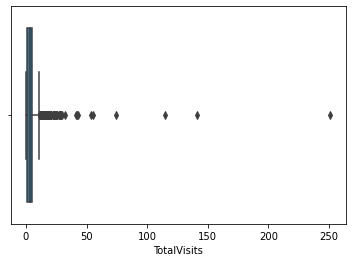

In [22]:
sns.boxplot(df["TotalVisits"])
plt.show()

#### - Inference : TotalVisits Column
From the summary we can see that 75% or data is less than 5, so we can consider replacing the 1.48% of null values with the <b>median</b> and also since the TotalVisits is an instance of a person visiting the site the value needs to be of int datatype

In [23]:
df["TotalVisits"].fillna(df["TotalVisits"].median(), inplace=True)
df["TotalVisits"] = df["TotalVisits"].astype('int64')

#### - Page Views Per Visit Column

In [24]:
df["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

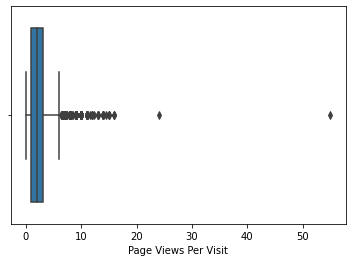

In [25]:
sns.boxplot(df["Page Views Per Visit"])
plt.show()

#### - Inference : Page Views Per Visit Column
From the summary we can see that 75% or data is less than 3.0, so we can consider replacing the 1.48% of null values with the <b>median</b> and also since the Page Views Per Visit is an instance of the pages visited the value needs to be of int datatype

In [26]:
df["Page Views Per Visit"].fillna(df["Page Views Per Visit"].median(), inplace=True)
df["Page Views Per Visit"] = df["Page Views Per Visit"].astype('int64')

#### - Last Activity

In [27]:
df["Last Activity"].value_counts(normalize=True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

#### - Inference : Last Activity Column
Since 37% of data has the value Email Opened, we can consider this value to impute the missing values in this column

In [28]:
df["Last Activity"].fillna(df["Last Activity"].mode()[0], inplace = True)

#### - Country

In [29]:
df["Country"].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
France                   0.088509
Oman                     0.088509
unknown                  0.073757
Canada                   0.059006
Kuwait                   0.059006
Nigeria                  0.059006
Germany                  0.059006
South Africa             0.059006
Sweden                   0.044254
Italy                    0.029503
Ghana                    0.029503
Bangladesh               0.029503
Uganda                   0.029503
Philippines              0.029503
Asia/Pacific Region      0.029503
Netherlands              0.029503
China                    0.029503
Belgium                  0.029503
Malaysia                 0.014751
Indonesia     

#### - Inference: Country Column
We can see that almost 96% of Data is having the value as India, and so this column is <b>heavily Skewed</b> and can be <b>dropped</b>

In [30]:
df.drop("Country", axis=1, inplace=True)

#### - Specialization Column

In [31]:
df["Specialization"].value_counts(normalize=True, dropna=False)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

#### Inference: Specialization Column
Since the Specialization wasnt mentioned and we can see that the speard of unique values is not normalized, we can assign a value of <b>not mentioned</b> for all the Null values

In [32]:
df["Specialization"]=df["Specialization"].replace(np.nan, 'Not Mentioned')

#### - What is your current occupation Column

In [33]:
df["What is your current occupation"].value_counts(normalize=True, dropna=False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

#### Inference: What is your current occupation Column
We can observe that the unique values can be grouped to decrease number of categories for this column, then the NaN values can be filled up randomly is avoid introducing bias

In [34]:
# Handling the 'What is your current occupation' column

# Replacing the Housewife values with Unemployed

df['What is your current occupation'].replace('Housewife','Unemployed',inplace=True)

# Replacing the Businessman values with Working Professional (Businessman are contributing very less % of total)

df['What is your current occupation'].replace('Businessman','Working Professional',inplace=True)

# Replacing the Other values with Student (Other are contributing very less % of total)

df['What is your current occupation'].replace('Other','Student',inplace=True)

# filling the null values with the % weightage of each category in specialization

df["What is your current occupation"] = df["What is your current occupation"].fillna(pd.Series(np.random.choice
                                            (df['What is your current occupation'].value_counts(normalize=True).index.to_list(), 
                                             p = df['What is your current occupation'].value_counts(normalize=True).to_list(), 
                                             size = len(df))))



#### - What matters most to you in choosing a course Column

In [35]:
df["What matters most to you in choosing a course"].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

#### - Inference : What matters most to you in choosing a course Column
From the above we can infer that the data is <b>skewed</b> almost to 100%, we can consider <b>dropping</b> this column

In [36]:
df.drop(["What matters most to you in choosing a course"], axis=1, inplace=True)

#### - Tags  Column

In [37]:
df["Tags"].value_counts(normalize=True, dropna=False)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

#### Inference: Tags Column
We can see that this column has almost 36% of Data as NaN, and since Tags column is filled up by Agents, can be considered to be dropped

In [38]:
df.drop(['Tags'], axis=1, inplace=True)

#### - City Column

In [39]:
df["City"].value_counts(normalize=True, dropna=False)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

#### - Inference : City Column
We can observe that the unique values can be further grouped and reduce the number of unique categories for this column as below <br>
Categories: <br>
1] Mumbai<br>
2] Thane & Outskirts + Other Cities of Maharashtra <br>
3] Other Cities + Other Metro Cities  + Tier II Cities <br>

In [40]:
# Handling the 'City' column

df['City'].replace(['Thane & Outskirts','Other Cities of Maharashtra'],'Non-Mumbai-Maharashtra',inplace=True)

df['City'].replace(['Other Cities','Other Metro Cities','Tier II Cities'],'Non-Maharashtra',inplace=True)

# filling the null values with the % weightage of each category in specialization


df["City"] = df["City"].fillna(pd.Series(np.random.choice
                                            (df['City'].value_counts(normalize=True).index.to_list(), 
                                             p = df['City'].value_counts(normalize=True).to_list(), 
                                             size = len(df))))



#### Do Not Email Column

In [41]:
df["Do Not Email"].value_counts(normalize=True) * 100

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

#### Inference : Do Not Email Column
Although this column contains 92% Data as No but still its a good metric to be considered, so not dropping yet

#### Do Not Call Column

In [42]:
df["Do Not Call"].value_counts(normalize=True)*100

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

#### Inference : Do Not Call Column
Its a Skewed Data, Can be dropped

In [43]:
df.drop(["Do Not Call"], axis=1, inplace=True)

#### - Search Columns

In [44]:
df["Search"].value_counts(normalize=True, dropna=False)*100

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

#### - Inference : Search Column
The Data is skewed, with almost 100% Data being No this column can be dropped

In [45]:
df.drop(["Search"], axis=1,  inplace=True)

#### - Newspaper Article Column

In [46]:
df["Newspaper Article"].value_counts(normalize=True, dropna=False)*100

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

#### - Inference : Newspaper Article Column
The Data is skewed, with almost 100% Data being No this column can be dropped

In [47]:
df.drop(["Newspaper Article"], axis=1,  inplace=True)

#### - X Education Forums Column

In [48]:
df["X Education Forums"].value_counts(normalize=True, dropna=False)*100

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

#### - Inference : X Education Forums Column
The Data is skewed, with almost 100% Data being No this column can be dropped

In [49]:
df.drop(["X Education Forums"], axis=1,  inplace=True)

#### Newspaper Column

In [50]:
df["Newspaper"].value_counts(normalize=True, dropna=False)*100

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

#### - Inference : Newspaper Column
The Data is skewed, with almost 100% Data being No this column can be dropped

In [51]:
df.drop(["Newspaper"], axis=1,  inplace=True)

#### - Digital Advertisement  Column

In [52]:
df["Digital Advertisement"].value_counts(normalize=True, dropna=False)*100

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

#### - Inference : Digital Advertisement Column
The Data is skewed, with almost 100% Data being No this column can be dropped

In [53]:
df.drop(["Digital Advertisement"], axis=1,  inplace=True)

#### Through Recommendations Column

In [54]:
df["Through Recommendations"].value_counts(normalize=True, dropna=False)*100

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

#### - Inference : Through Recommendations Column
The Data is skewed, with almost 100% Data being No this column can be dropped

In [55]:
df.drop(["Through Recommendations"], axis=1,  inplace=True)

### - Dropping columns with Single Value

In [56]:
df_cols = df.columns.to_list()
for col in df_cols:
    if len(df[col].value_counts()) == 1:
        print(col)

Magazine
Receive More Updates About Our Courses
Update me on Supply Chain Content
Get updates on DM Content
I agree to pay the amount through cheque


#### - Inference: These 5 Columns have a single value and can be dropped

In [57]:
df.drop(["Magazine", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"], axis=1, inplace = True)

### - Dropping Rows with more than 70% NaN values

In [58]:
df.shape

(9240, 16)

#### Inference Rows
Since there are 22 rows, We can say that the rows with less than 5 non NaN Values can be dropped

In [59]:
df = df.dropna(thresh=5)
df.shape

(9240, 16)

## Step 3] EDA

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Prospect ID                             9240 non-null   object
 1   Lead Number                             9240 non-null   int64 
 2   Lead Origin                             9240 non-null   object
 3   Lead Source                             9204 non-null   object
 4   Do Not Email                            9240 non-null   object
 5   Converted                               9240 non-null   int64 
 6   TotalVisits                             9240 non-null   int64 
 7   Total Time Spent on Website             9240 non-null   int64 
 8   Page Views Per Visit                    9240 non-null   int64 
 9   Last Activity                           9240 non-null   object
 10  Specialization                          9240 non-null   object
 11  How 

#### - Drop Lead Number and Prospect ID 

In [61]:
df.drop(["Prospect ID"], axis=1, inplace=True)

### - Analysis of Numerical Columns

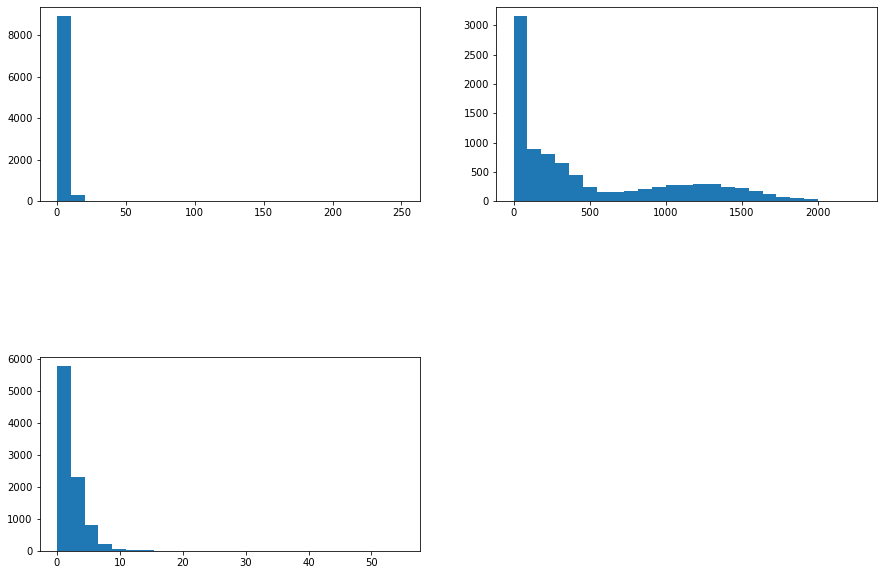

In [62]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.8)

plt.subplot(2,2,1)
plt.hist(df["TotalVisits"], bins=25)

plt.subplot(2,2,2)
plt.hist(df["Total Time Spent on Website"], bins=25)

plt.subplot(2,2,3)
plt.hist(df["Page Views Per Visit"], bins=25)


plt.show()

#### Inference: Numerical Columns
All 3 columns data seems to be skewed which can be infered from the peak of data in the plot

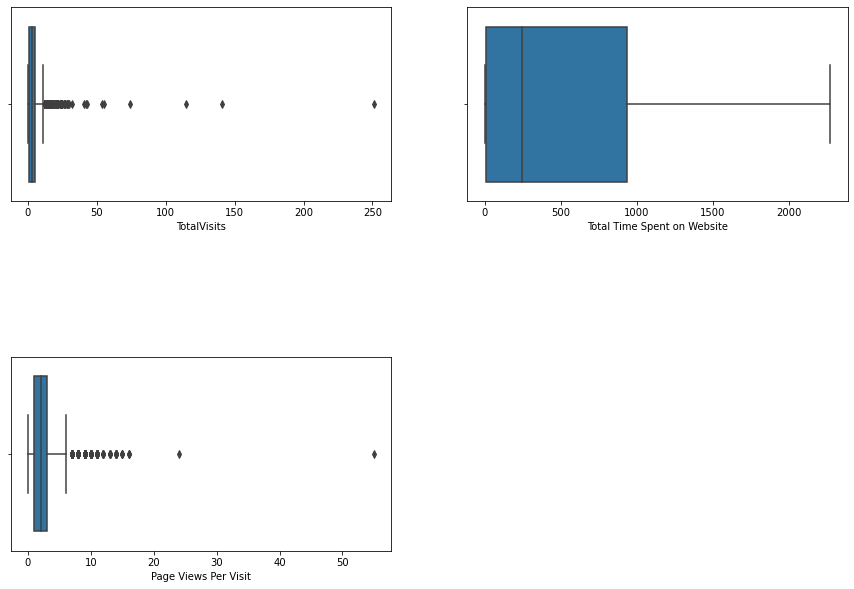

In [63]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.8)

plt.subplot(2,2,1)
sns.boxplot(df["TotalVisits"])

plt.subplot(2,2,2)
sns.boxplot(df["Total Time Spent on Website"])

plt.subplot(2,2,3)
sns.boxplot(df["Page Views Per Visit"])


plt.show()

#### Inference : Numerical Columns
The columns TotalVisits and Page Views Per Visit have outliers and Total Time Spent on Website is evenly spread out

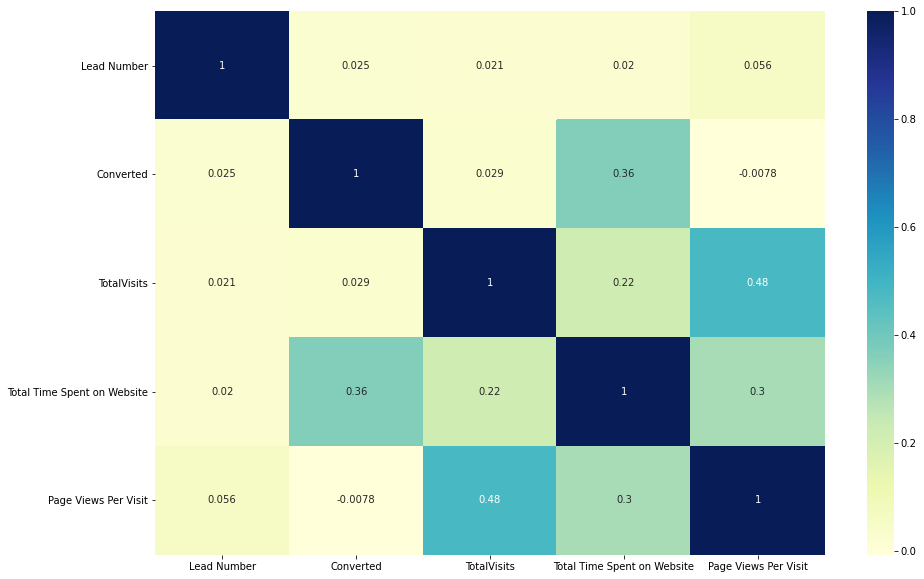

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### Inference :
There are no 2 columns highly correlated with each other

#### - Handling the outliers
Columns TotalVisits and Page Views Per Visit can be capped with 99 Percentile

In [65]:
df["TotalVisits"].loc[df["TotalVisits"] >= df["TotalVisits"].quantile(0.99)] = df["TotalVisits"].quantile(0.99)
df["Page Views Per Visit"].loc[df["Page Views Per Visit"] >= df["Page Views Per Visit"].quantile(0.99)] = df["Page Views Per Visit"].quantile(0.99)

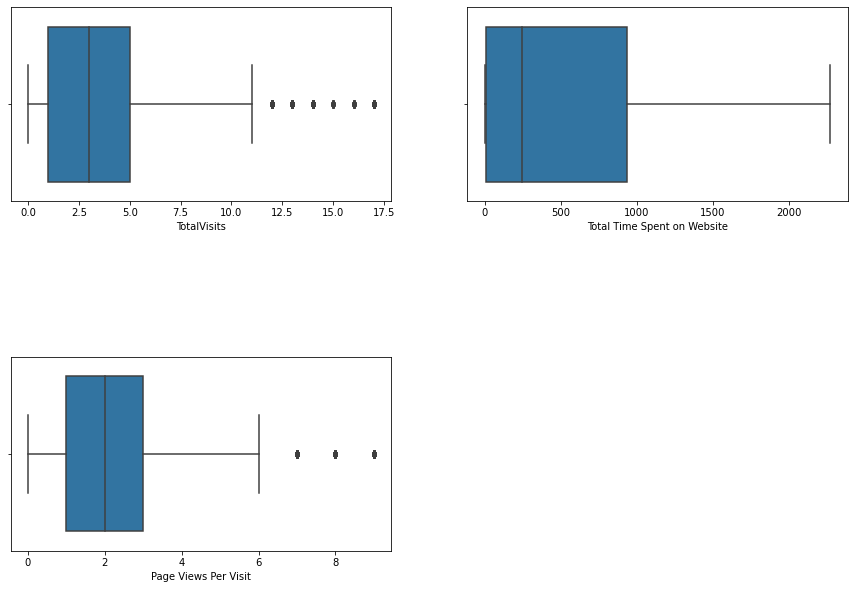

In [66]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.8)

plt.subplot(2,2,1)
sns.boxplot(df["TotalVisits"])

plt.subplot(2,2,2)
sns.boxplot(df["Total Time Spent on Website"])

plt.subplot(2,2,3)
sns.boxplot(df["Page Views Per Visit"])


plt.show()

### Analysis of Categorical Columns

#### Lead Origin Column

In [67]:
df["Lead Origin"].value_counts(normalize=True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

#### Inference: Lead Origin Column
The Columns with less percent can be grouped into a single category as Others

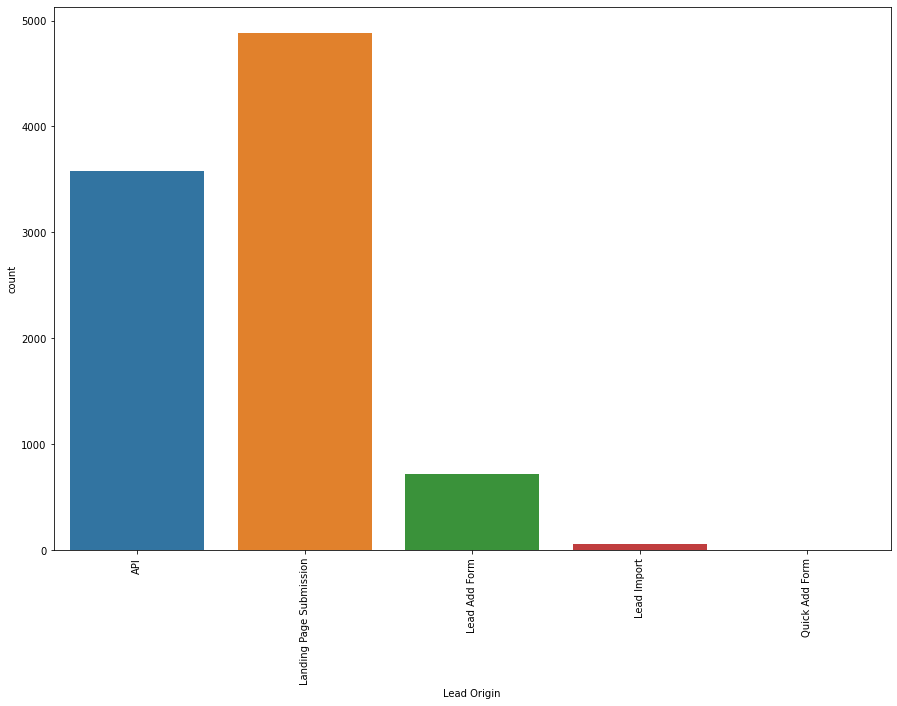

In [68]:
plt.figure(figsize=(15,10))
sns.countplot(df["Lead Origin"])
plt.xticks(rotation=90)
plt.show()

#### Lead Source Column

In [69]:
df["Lead Source"].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Social Media          0.021730
Press_Release         0.021730
Live Chat             0.021730
NC_EDM                0.010865
youtubechannel        0.010865
testone               0.010865
WeLearn               0.010865
Pay per Click Ads     0.010865
blog                  0.010865
welearnblog_Home      0.010865
Name: Lead Source, dtype: float64

#### Inference: Lead Source Column
The Columns with less percent can be grouped into a single category as Others and there is a value with google and Google can be replaced with single value

In [70]:
# Handling the 'Lead Source' column
# Note: Google and google are the same, Handling this case first

df['Lead Source'].replace('google','Google',inplace=True)

# filling the values whose contgribution is < 1% as 'Other'

df['Lead Source'].fillna('Other',inplace=True)

# replacing the remaining categories with 'Other'

df['Lead Source'].replace(['Facebook','bing','Click2call','Social Media','Press_Release','Live Chat','youtubechannel',
 'welearnblog_Home','WeLearn','Pay per Click Ads','blog','testone','NC_EDM'],'Other',inplace=True)

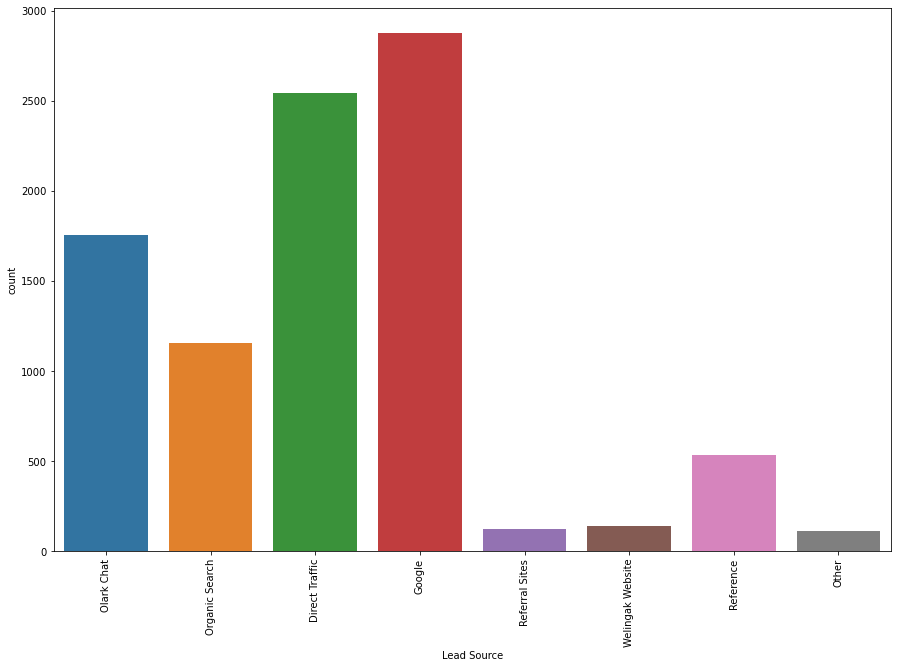

In [71]:
plt.figure(figsize=(15,10))
sns.countplot(df["Lead Source"])
plt.xticks(rotation=90)
plt.show()

#### Specialization Column

In [72]:
df["Specialization"].value_counts(normalize=True)*100

Not Mentioned                        36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

#### Inference : Specialization Column
We observe that these categories can be grouped into 2 or 3 main categories as below<br>
Categories: <br>
1] Management Related -  Finance Management + Human Resource Management + Marketing Management + Operations Management + IT Projects Management + Supply Chain Management + Healthcare Management + Hospitality Management + Retail Management <br>
2] Industry Related - Banking, Investment And Insurance + Travel and Tourism + Media and Advertising + Services Excellence <br>
3] Business - Business Administration + International Business + E-COMMERCE + Rural and Agribusiness + E-Business <br>

In [73]:
df.loc[(df["Specialization"] == "Finance Management") |
       (df["Specialization"] == "Human Resource Management") |
       (df["Specialization"] == "Marketing Management") |
       (df["Specialization"] == "Operations Management") |
       (df["Specialization"] == "IT Projects Management") |
       (df["Specialization"] == "Supply Chain Management") |
       (df["Specialization"] == "Healthcare Management") |
       (df["Specialization"] == "Hospitality Management") |
       (df["Specialization"] == "Retail Management"), "Specialization"] = "Management"
df.loc[(df["Specialization"] == "Banking, Investment And Insurance") |
       (df["Specialization"] == "Travel and Tourism") |
       (df["Specialization"] == "Media and Advertising") |
       (df["Specialization"] == "Services Excellence") ,"Specialization"] = "Industry"
df.loc[(df["Specialization"] == "Business Administration")|
       (df["Specialization"] == "International Business")|
       (df["Specialization"] == "E-COMMERCE")|
       (df["Specialization"] == "Rural and Agribusiness")|
       (df["Specialization"] == "E-Business"), "Specialization"] = "Business"

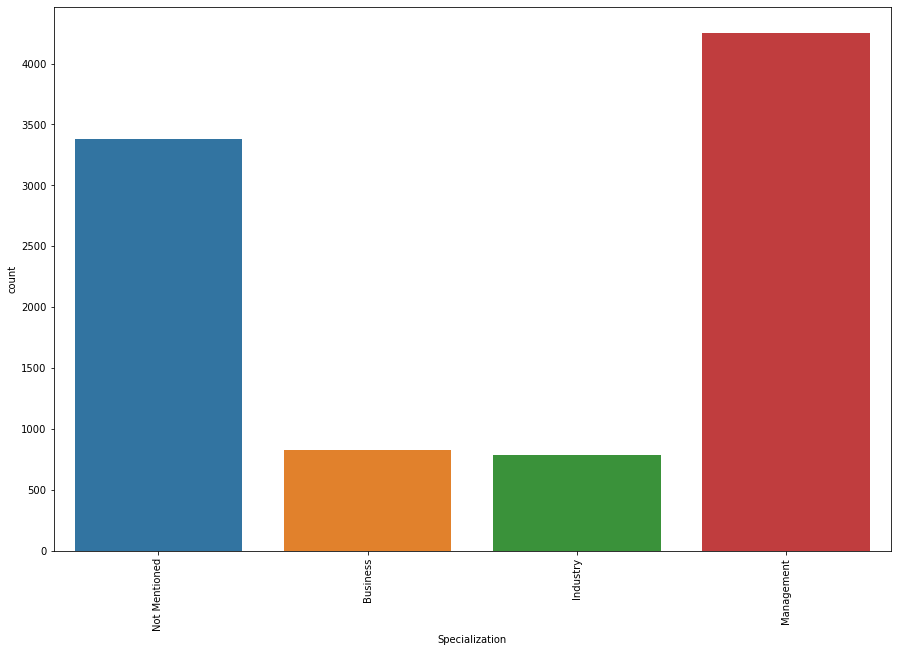

In [74]:
plt.figure(figsize=(15,10))
sns.countplot(df["Specialization"])
plt.xticks(rotation=90)
plt.show()

#### - What is your current occupation Column

In [75]:
df["What is your current occupation"].value_counts(normalize=True, dropna=False)*100

Unemployed              85.227273
Working Professional    11.071429
Student                  3.701299
Name: What is your current occupation, dtype: float64

#### - Inference : What is your current occupation Column
Most of the records occupation is Unemployed

#### - City Column

In [76]:
df["City"].value_counts(normalize=True, dropna=False)*100

Mumbai                    58.376623
Non-Mumbai-Maharashtra    21.515152
Non-Maharashtra           20.108225
Name: City, dtype: float64

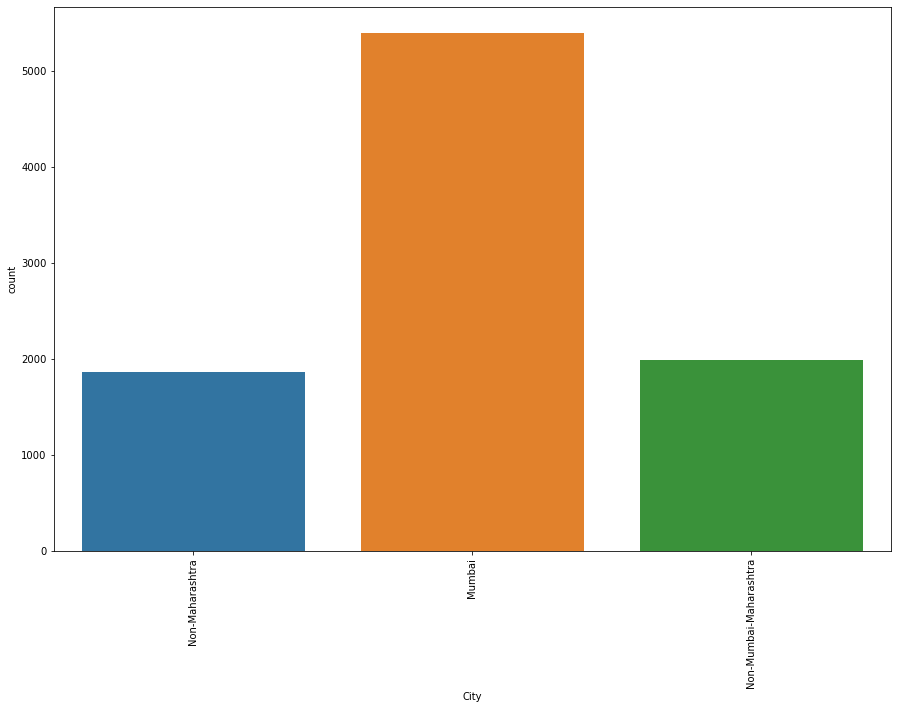

In [77]:
plt.figure(figsize=(15,10))
sns.countplot(df["City"])
plt.xticks(rotation=90)
plt.show()

#### Inference : City Column
Most of the Applicants belong to Mumbai City

#### A free copy of Mastering The Interview Column

In [78]:
df["A free copy of Mastering The Interview"].value_counts(normalize=True, dropna=False)*100

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

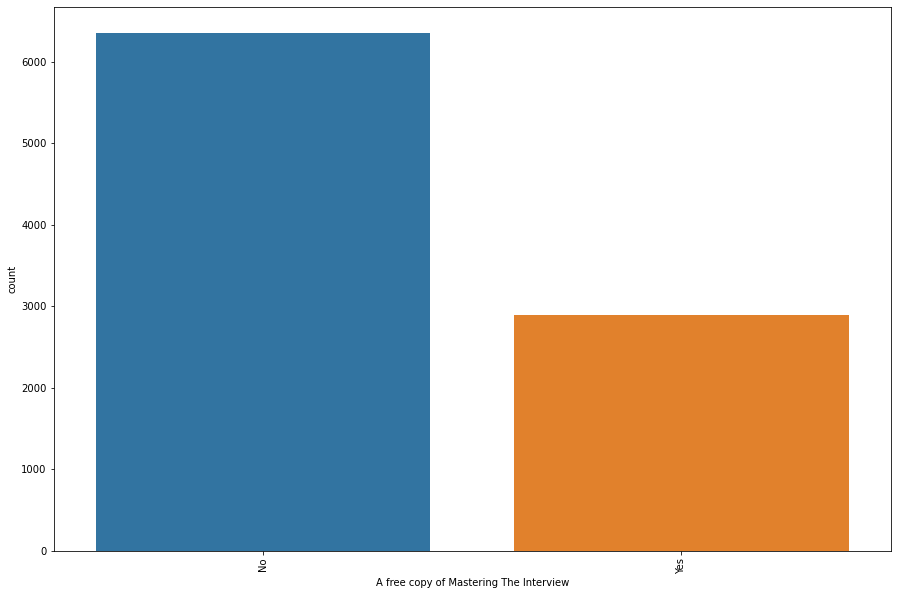

In [79]:
plt.figure(figsize=(15,10))
sns.countplot(df["A free copy of Mastering The Interview"])
plt.xticks(rotation=90)
plt.show()

#### Inference : A free copy of Mastering The Interview Column
Data is well spread between Yes and No

#### Last Notable Activity Column

In [80]:
df["Last Notable Activity"].value_counts(normalize=True, dropna=False)*100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Email Received                   0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Resubscribed to emails           0.010823
Name: Last Notable Activity, dtype: float64

#### Inference : Last Notable Activity Column
The Columns with less percent can be grouped into a single category as Others

In [81]:
df.loc[(df["Last Notable Activity"] == "Page Visited on Website") |
       (df["Last Notable Activity"] == "Olark Chat Conversation") |
       (df["Last Notable Activity"] == "Email Link Clicked") |
       (df["Last Notable Activity"] == "Email Bounced") |
       (df["Last Notable Activity"] == "Unsubscribed") |
       (df["Last Notable Activity"] == "Unreachable") |
       (df["Last Notable Activity"] == "Had a Phone Conversation") |
       (df["Last Notable Activity"] == "Email Marked Spam") |
       (df["Last Notable Activity"] == "Form Submitted on Website") |
       (df["Last Notable Activity"] == "Approached upfront") |
       (df["Last Notable Activity"] == "View in browser link Clicked") |
       (df["Last Notable Activity"] == "Email Received") |
       (df["Last Notable Activity"] == "Resubscribed to emails"), "Last Notable Activity"] = "Others"

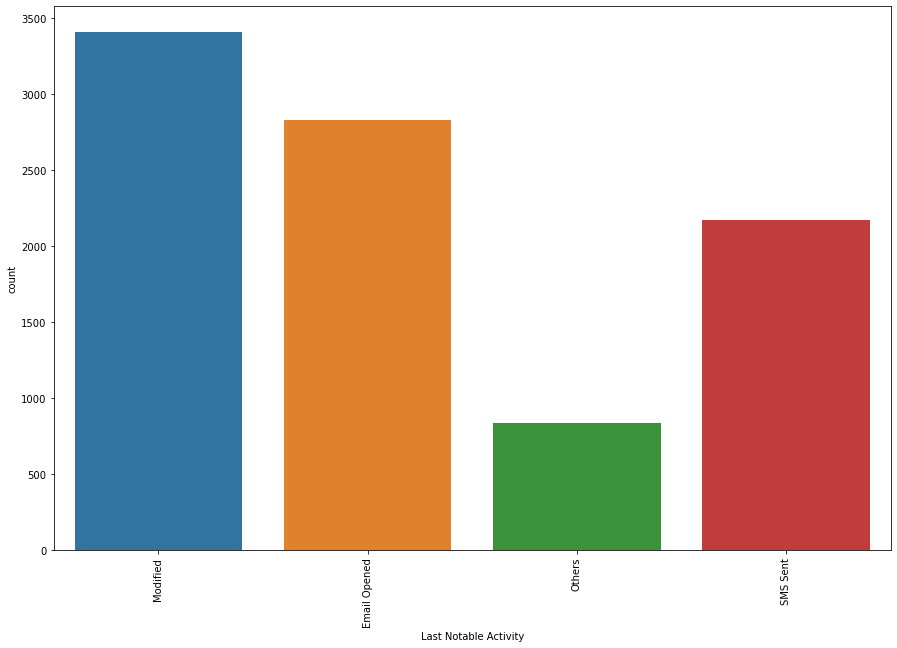

In [82]:
plt.figure(figsize=(15,10))
sns.countplot(df["Last Notable Activity"])
plt.xticks(rotation=90)
plt.show()

In [83]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

#### - Consider dropping Columns that are generated by Sales team

In [84]:
df.drop(["Last Activity", "Last Notable Activity"], axis=1,  inplace=True)

In [85]:
df.shape

(9240, 13)

## Step 4] Data Preparation

In [86]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'City', 'A free copy of Mastering The Interview'],
      dtype='object')

#### - Convert Binary Columns to 0 or 1

In [87]:
df_cols = df.columns.to_list()
for col in df_cols:
    if len(df[col].value_counts()) == 2:
        print(col)

Do Not Email
Converted
How did you hear about X Education
A free copy of Mastering The Interview


In [88]:
df["Do Not Email"] = df["Do Not Email"].map({'Yes': 1, 'No': 0})
df["A free copy of Mastering The Interview"] = df["A free copy of Mastering The Interview"].map({'Yes': 1, 'No': 0})

#### - Create Dummy variables for Categorical Columns

In [89]:
cat_cols = df.nunique()
cat_cols[cat_cols>1]

Lead Number                               9240
Lead Origin                                  5
Lead Source                                  8
Do Not Email                                 2
Converted                                    2
TotalVisits                                 18
Total Time Spent on Website               1731
Page Views Per Visit                        10
Specialization                               4
How did you hear about X Education           2
What is your current occupation              3
City                                         3
A free copy of Mastering The Interview       2
dtype: int64

In [90]:
# Creating dummy variables for the categorical variables and dropping the level with least interpretability

# Creating dummy variables for the variable 'Lead Origin'

lo = pd.get_dummies(df['Lead Origin'], prefix='Lead Origin')
# Dropping Lead Origin_Quick Add Form  column
lo1 = lo.drop(['Lead Origin_Quick Add Form'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,lo1], axis=1)

# Creating dummy variables for the variable 'Lead Source'

ls = pd.get_dummies(df['Lead Source'], prefix='Lead Source')
# Dropping Lead Source_Other column
ls1 = ls.drop(['Lead Source_Other'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ls1], axis=1)

# Creating dummy variables for the variable 'Specialization'

sp = pd.get_dummies(df['Specialization'], prefix='Specialization')
# Dropping Specialization_Not Provided column
sp1 = sp.drop(['Specialization_Not Mentioned'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,sp1], axis=1)

# Creating dummy variables for the variable 'How did you hear about X Education'

src = pd.get_dummies(df['How did you hear about X Education'], prefix='How did you hear about X Education')
# Dropping How did you hear about X Education_Not Answered column
src1 = src.drop(['How did you hear about X Education_Not Answered'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,src1], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'

occ = pd.get_dummies(df['What is your current occupation'], prefix='What is your current occupation')
# Dropping What is your current occupation_Student column
occ1 = occ.drop(['What is your current occupation_Student'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,occ1], axis=1)

# Creating dummy variables for the variable 'City'

ct = pd.get_dummies(df['City'], prefix='City')
# Dropping City_Non-Maharashtra column
ct1 = ct.drop(['City_Non-Maharashtra'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ct1], axis=1)

In [91]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'City', 'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Business', 'Specialization_Industry',
       'Specialization_Management',
       'How did you hear about X Education_Answered',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'City_Mumbai',
       'City_Non-Mumbai-Maharashtra'],
      dtype='ob

In [92]:
df = df.drop(['Lead Origin','Lead Source','Specialization','How did you hear about X Education',
                              'What is your current occupation','City'],1)

#### - Correlations

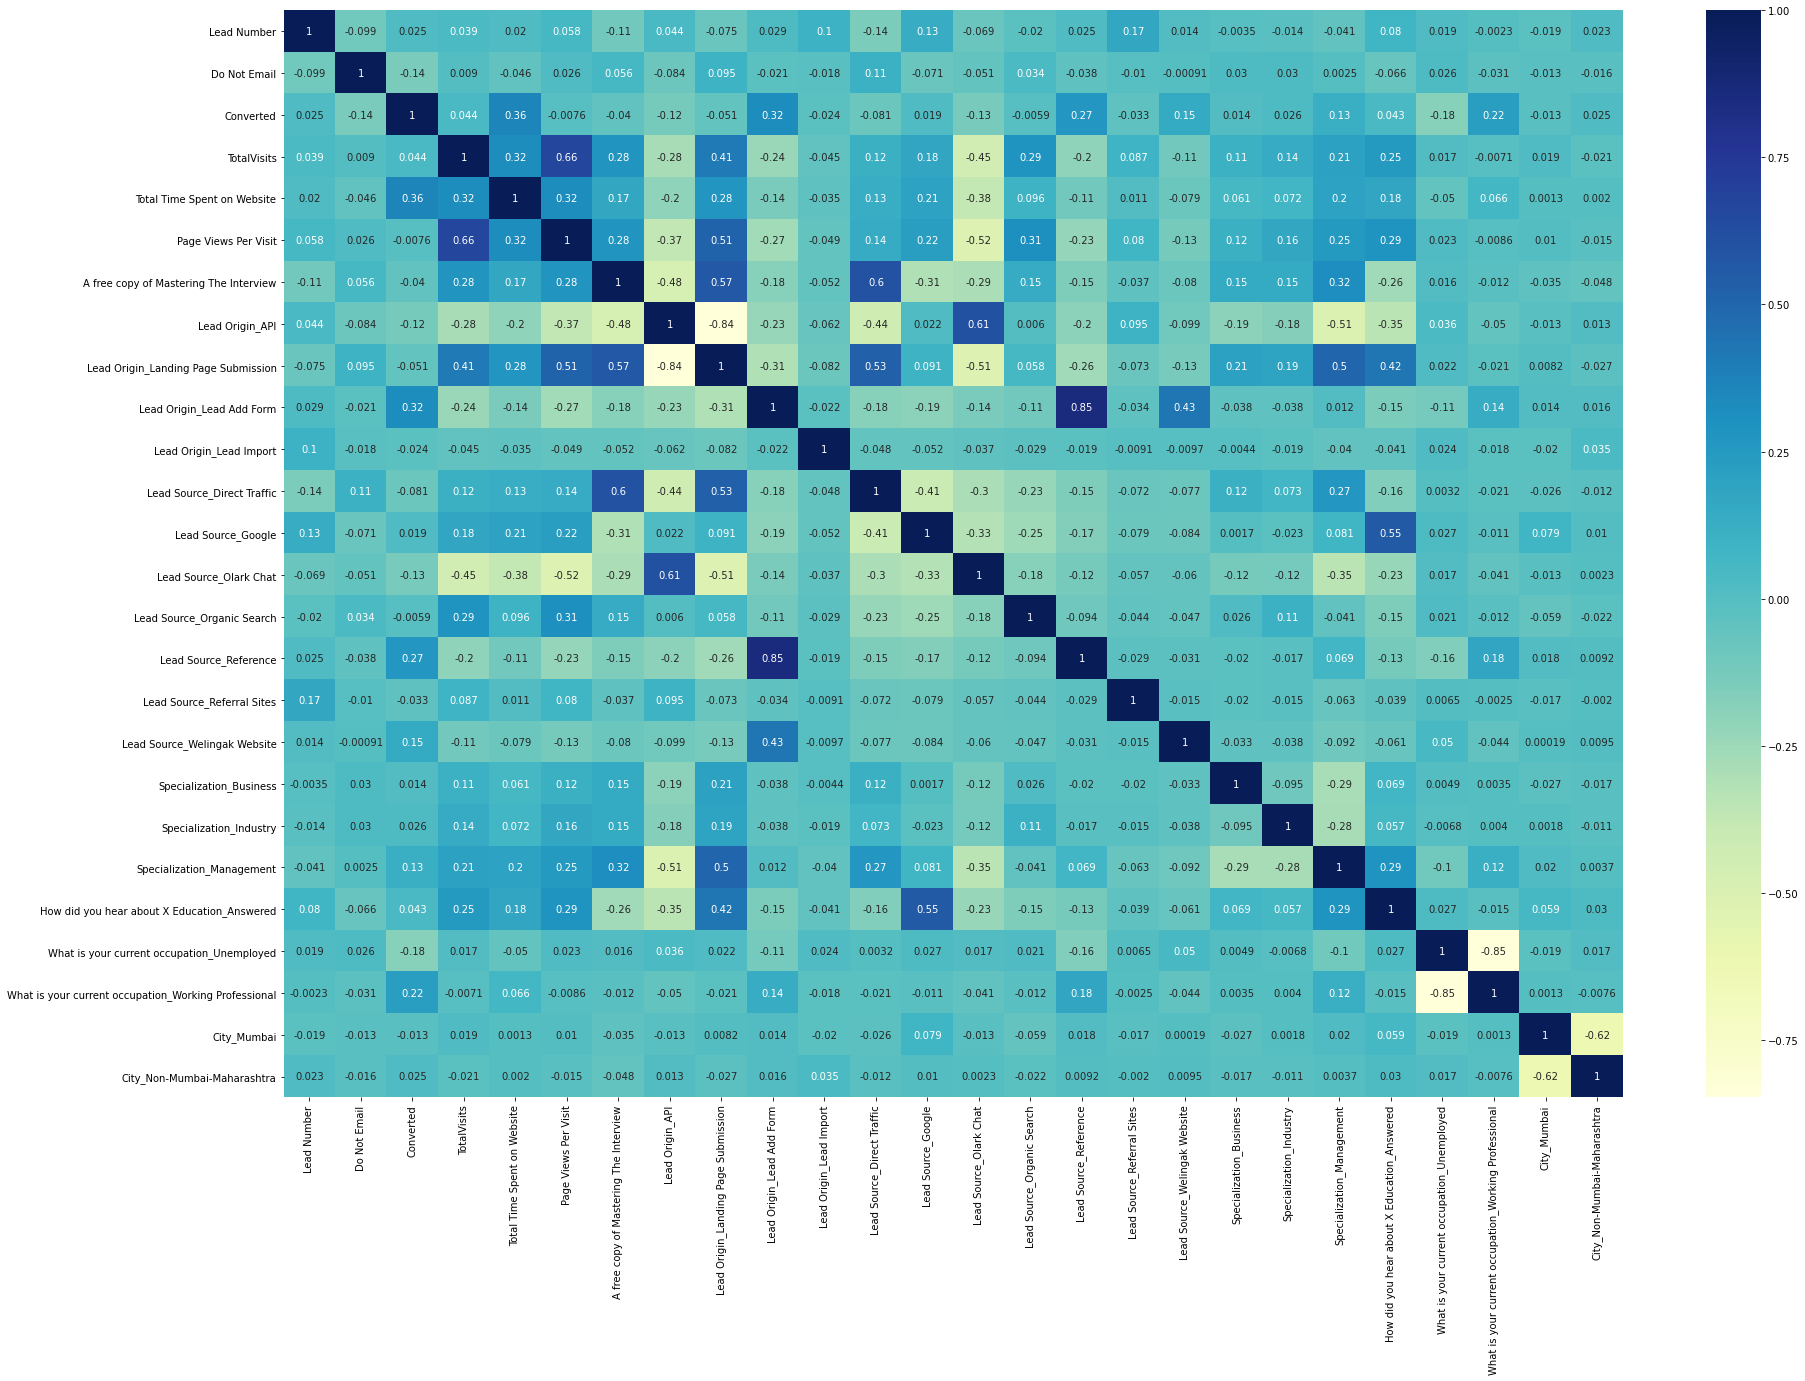

In [93]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [94]:
df.shape

(9240, 26)

In [95]:
df.columns

Index(['Lead Number', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Business', 'Specialization_Industry',
       'Specialization_Management',
       'How did you hear about X Education_Answered',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'City_Mumbai',
       'City_Non-Mumbai-Maharashtra'],
      dtype='object')

### - Splitting Data into Test-Train

In [96]:
from sklearn.model_selection import train_test_split

#### - Feature variable to X

In [97]:
X = df.drop(["Converted", "Lead Number"], axis=1)
X.head(3)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business,Specialization_Industry,Specialization_Management,How did you hear about X Education_Answered,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Non-Mumbai-Maharashtra
0,0,0.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


#### - Response variable y

In [98]:
y = df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### - Feature Scaling

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
df.nunique()

Lead Number                                             9240
Do Not Email                                               2
Converted                                                  2
TotalVisits                                               18
Total Time Spent on Website                             1731
Page Views Per Visit                                      10
A free copy of Mastering The Interview                     2
Lead Origin_API                                            2
Lead Origin_Landing Page Submission                        2
Lead Origin_Lead Add Form                                  2
Lead Origin_Lead Import                                    2
Lead Source_Direct Traffic                                 2
Lead Source_Google                                         2
Lead Source_Olark Chat                                     2
Lead Source_Organic Search                                 2
Lead Source_Reference                                      2
Lead Source_Referral Sit

In [102]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[
    ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head(3)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business,Specialization_Industry,Specialization_Management,How did you hear about X Education_Answered,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Non-Mumbai-Maharashtra
1871,0,-1.022595,-0.885371,-1.143220,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0
6795,0,0.205373,0.005716,-0.635227,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3516,0,0.512365,-0.691418,-0.127234,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


#### - Current Conversion Rate

In [103]:
conversion = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion

38.53896103896104

## Step 5] Build Model

### - Build Logistic Regression Model

In [104]:
import statsmodels.api as sm

In [105]:
logm1 = sm.GLM(y_train.astype(int),(sm.add_constant(X_train.astype(int))), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3271.7
Date:                Wed, 11 Aug 2021   Deviance:                       6543.4
Time:                        09:48:29   Pearson chi2:                 6.75e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   16.5173   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Do Not Email                                            -1.4170      0.152     -9.307      0.000      -1.715      -1.119
TotalVisits                                              0.1271      0.048      2.659      0.008       0.033       0.221
Total Time Spent on Website                              1.3419      0.060     22.292      0.000       1.224       1.460
Page Views Per Visit                                    -0.0632      0.061     -1.032      0.302      -0.183       0.057
A free copy of Mastering The Interview                  -0.2659      0.115     -2.313      0.021      -0.491      -0.041
Lead Origin_API                                        -17.6292   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission                    -18.5516   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Add Form                              -14.9830   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Import                                -18.7218   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Direct Traffic                              -0.4766      0.597     -0.799      0.424      -1.646       0.693
Lead Source_Google                                      -0.2721      0.596     -0.457      0.648      -1.440       0.895
Lead Source_Olark Chat                                  -0.2703      0.604     -0.448      0.654      -1.454       0.913
Lead Source_Organic Search                              -0.3082      0.599     -0.515      0.607      -1.482       0.866
Lead Source_Reference                                   -0.1751      0.506     -0.346      0.729      -1.167       0.817
Lead Source_Referral Sites                              -0.7018      0.653     -1.074      0.283      -1.982       0.578
Lead Source_Welingak Website                             2.4517      0.856      2.863      0.004       0.773       4.130
Specialization_Business                                  1.3828      0.150      9.214      0.000       1.089       1.677
Specialization_Industry                                  1.5859      0.153     10.395      0.000       1.287       1.885
Specialization_Management                                1.4975      0.119     12.553      0.000       1.264       1.731
How did you hear about X Education_Answered             -0.0206      0.126     -0.163      0.870      -0.268       0.227
What is your current occupation_Unemployed               0.0777      0.175      0.445      0.656      -0.264       0.420
What is your current occupation_Working Professional     1

### - Feature Selection using RFE

In [106]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [107]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [108]:
rfe.support_

array([ True, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True, False, False,  True, False, False])

In [109]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('A free copy of Mastering The Interview', False, 3),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', False, 10),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business', True, 1),
 ('Specialization_Industry', True, 1),
 ('Specialization_Management', True, 1),
 ('How did you hear about X Education_Answered', False, 7),
 ('What is your current occupation_Unemployed', False, 9),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Mumbai', False, 5),
 ('City_Non-Mumbai-Maharashtra'

In [110]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Google',
       'Lead Source_Reference', 'How did you hear about X Education_Answered',
       'What is your current occupation_Unemployed', 'City_Mumbai',
       'City_Non-Mumbai-Maharashtra'],
      dtype='object')

#### - Assessing the model with Statsmodels

In [111]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3057.9
Date:                Wed, 11 Aug 2021   Deviance:                       6115.9
Time:                        09:48:32   Pearson chi2:                 7.06e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   17.2869   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Do Not Email                                            -1.3886      0.154     -8.995      0.000      -1.691      -1.086
Total Time Spent on Website                              1.0777      0.037     29.170      0.000       1.005       1.150
Lead Origin_API                                        -18.5512   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission                    -19.4280   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Add Form                              -15.1079   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Import                                -18.9600   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Direct Traffic                              -0.3154      0.086     -3.648      0.000      -0.485      -0.146
Lead Source_Olark Chat                                   0.6783      0.115      5.908      0.000       0.453       0.903
Lead Source_Organic Search                              -0.0800      0.104     -0.768      0.442      -0.284       0.124
Lead Source_Referral Sites                              -0.4566      0.291     -1.569      0.117      -1.027       0.114
Lead Source_Welingak Website                             2.6040      0.744      3.500      0.000       1.146       4.062
Specialization_Business                                  1.2500      0.151      8.299      0.000       0.955       1.545
Specialization_Industry                                  1.4319      0.153      9.381      0.000       1.133       1.731
Specialization_Management                                1.2959      0.116     11.212      0.000       1.069       1.522
What is your current occupation_Working Professional     1.2319      0.103     12.001      0.000       1.031       1.433
========================================================================================================================
"""

In [112]:
col = col.drop("Lead Origin_API", 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3058.1
Date:                Wed, 11 Aug 2021   Deviance:                       6116.1
Time:                        09:48:32   Pearson chi2:                 7.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2640      0.083    -15.159      0.000      -1.427      -1.101
Do Not Email                                            -1.3860      0.154     -8.993      0.000      -1.688      -1.084
Total Time Spent on Website                              1.0782      0.037     29.192      0.000       1.006       1.151
Lead Origin_Landing Page Submission                     -0.8782      0.124     -7.102      0.000      -1.121      -0.636
Lead Origin_Lead Add Form                                3.4427      0.201     17.103      0.000       3.048       3.837
Lead Origin_Lead Import                                 -0.4094      0.518     -0.790      0.430      -1.425       0.607
Lead Source_Direct Traffic                              -0.3156      0.086     -3.650      0.000      -0.485      -0.146
Lead Source_Olark Chat                                   0.6782      0.115      5.906      0.000       0.453       0.903
Lead Source_Organic Search                              -0.0804      0.104     -0.772      0.440      -0.284       0.124
Lead Source_Referral Sites                              -0.4571      0.291     -1.571      0.116      -1.027       0.113
Lead Source_Welingak Website                             2.6041      0.744      3.500      0.000       1.146       4.062
Specialization_Business                                  1.2523      0.151      8.321      0.000       0.957       1.547
Specialization_Industry                                  1.4329      0.153      9.388      0.000       1.134       1.732
Specialization_Management                                1.2969      0.116     11.221      0.000       1.070       1.523
What is your current occupation_Working Professional     1.2317      0.103     11.999      0.000       1.030       1.433
========================================================================================================================
"""

In [113]:
col = col.drop("Lead Source_Organic Search", 1)
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3058.4
Date:                Wed, 11 Aug 2021   Deviance:                       6116.7
Time:                        09:48:32   Pearson chi2:                 7.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2854      0.079    -16.317      0.000      -1.440      -1.131
Do Not Email                                            -1.3906      0.154     -9.031      0.000      -1.692      -1.089
Total Time Spent on Website                              1.0785      0.037     29.205      0.000       1.006       1.151
Lead Origin_Landing Page Submission                     -0.8797      0.124     -7.114      0.000      -1.122      -0.637
Lead Origin_Lead Add Form                                3.4640      0.199     17.365      0.000       3.073       3.855
Lead Origin_Lead Import                                 -0.3886      0.518     -0.751      0.453      -1.403       0.626
Lead Source_Direct Traffic                              -0.2943      0.082     -3.590      0.000      -0.455      -0.134
Lead Source_Olark Chat                                   0.6996      0.112      6.273      0.000       0.481       0.918
Lead Source_Referral Sites                              -0.4357      0.290     -1.504      0.133      -1.003       0.132
Lead Source_Welingak Website                             2.6056      0.744      3.502      0.000       1.147       4.064
Specialization_Business                                  1.2520      0.151      8.318      0.000       0.957       1.547
Specialization_Industry                                  1.4250      0.152      9.358      0.000       1.127       1.723
Specialization_Management                                1.3003      0.116     11.256      0.000       1.074       1.527
What is your current occupation_Working Professional     1.2322      0.103     12.000      0.000       1.031       1.433
========================================================================================================================
"""

In [114]:
col = col.drop("Lead Origin_Lead Import", 1)
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3058.7
Date:                Wed, 11 Aug 2021   Deviance:                       6117.3
Time:                        09:48:32   Pearson chi2:                 7.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2935      0.078    -16.558      0.000      -1.447      -1.140
Do Not Email                                            -1.3897      0.154     -9.024      0.000      -1.692      -1.088
Total Time Spent on Website                              1.0799      0.037     29.269      0.000       1.008       1.152
Lead Origin_Landing Page Submission                     -0.8694      0.123     -7.077      0.000      -1.110      -0.629
Lead Origin_Lead Add Form                                3.4742      0.199     17.455      0.000       3.084       3.864
Lead Source_Direct Traffic                              -0.2938      0.082     -3.583      0.000      -0.454      -0.133
Lead Source_Olark Chat                                   0.7092      0.111      6.397      0.000       0.492       0.926
Lead Source_Referral Sites                              -0.4296      0.290     -1.483      0.138      -0.997       0.138
Lead Source_Welingak Website                             2.6044      0.744      3.500      0.000       1.146       4.063
Specialization_Business                                  1.2486      0.150      8.302      0.000       0.954       1.543
Specialization_Industry                                  1.4218      0.152      9.346      0.000       1.124       1.720
Specialization_Management                                1.2970      0.115     11.247      0.000       1.071       1.523
What is your current occupation_Working Professional     1.2331      0.103     12.009      0.000       1.032       1.434
========================================================================================================================
"""

In [115]:
col = col.drop("Lead Source_Referral Sites", 1)
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3059.8
Date:                Wed, 11 Aug 2021   Deviance:                       6119.6
Time:                        09:48:32   Pearson chi2:                 7.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3161      0.077    -17.144      0.000      -1.467      -1.166
Do Not Email                                            -1.3888      0.154     -9.023      0.000      -1.691      -1.087
Total Time Spent on Website                              1.0801      0.037     29.276      0.000       1.008       1.152
Lead Origin_Landing Page Submission                     -0.8555      0.122     -6.989      0.000      -1.095      -0.616
Lead Origin_Lead Add Form                                3.4954      0.199     17.600      0.000       3.106       3.885
Lead Source_Direct Traffic                              -0.2884      0.082     -3.521      0.000      -0.449      -0.128
Lead Source_Olark Chat                                   0.7315      0.110      6.651      0.000       0.516       0.947
Lead Source_Welingak Website                             2.6058      0.744      3.502      0.000       1.148       4.064
Specialization_Business                                  1.2529      0.150      8.334      0.000       0.958       1.548
Specialization_Industry                                  1.4248      0.152      9.369      0.000       1.127       1.723
Specialization_Management                                1.3015      0.115     11.295      0.000       1.076       1.527
What is your current occupation_Working Professional     1.2312      0.103     11.986      0.000       1.030       1.432
========================================================================================================================
"""

### - Verifying the VIF Values

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,7.26
9,Specialization_Management,5.41
4,Lead Source_Direct Traffic,1.91
7,Specialization_Business,1.87
8,Specialization_Industry,1.81
3,Lead Origin_Lead Add Form,1.70
6,Lead Source_Welingak Website,1.27
1,Total Time Spent on Website,1.24
5,Lead Source_Olark Chat,1.21
10,What is your current occupation_Working Profes...,1.20


In [118]:
col = col.drop('Lead Origin_Landing Page Submission',1)

In [119]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3084.7
Date:                Wed, 11 Aug 2021   Deviance:                       6169.5
Time:                        09:48:32   Pearson chi2:                 6.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4742      0.075    -19.615      0.000      -1.622      -1.327
Do Not Email                                            -1.4109      0.153     -9.203      0.000      -1.711      -1.110
Total Time Spent on Website                              1.0925      0.037     29.639      0.000       1.020       1.165
Lead Origin_Lead Add Form                                3.8906      0.188     20.689      0.000       3.522       4.259
Lead Source_Direct Traffic                              -0.4520      0.078     -5.761      0.000      -0.606      -0.298
Lead Source_Olark Chat                                   0.9866      0.104      9.449      0.000       0.782       1.191
Lead Source_Welingak Website                             2.3969      0.743      3.227      0.001       0.941       3.853
Specialization_Business                                  0.7116      0.128      5.571      0.000       0.461       0.962
Specialization_Industry                                  0.8668      0.128      6.769      0.000       0.616       1.118
Specialization_Management                                0.7705      0.085      9.028      0.000       0.603       0.938
What is your current occupation_Working Professional     1.2774      0.101     12.604      0.000       1.079       1.476
========================================================================================================================
"""

In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Management,1.77
3,Lead Source_Direct Traffic,1.69
2,Lead Origin_Lead Add Form,1.41
5,Lead Source_Welingak Website,1.24
1,Total Time Spent on Website,1.23
9,What is your current occupation_Working Profes...,1.19
4,Lead Source_Olark Chat,1.18
6,Specialization_Business,1.14
7,Specialization_Industry,1.10
0,Do Not Email,1.09


### Train set Predicted Values

In [121]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.33527005, 0.12786392, 0.22390655, 0.70765802, 0.18924294,
       0.89071729, 0.17365676, 0.98401332, 0.30739746, 0.66439192])

In [122]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Index'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Index
0,0,0.335270,1871
1,0,0.127864,6795
2,0,0.223907,3516
3,0,0.707658,8105
4,0,0.189243,3934


In [123]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Index,Predicted
0,0,0.335270,1871,0
1,0,0.127864,6795,0
2,0,0.223907,3516,0
3,0,0.707658,8105,1
4,0,0.189243,3934,0


In [124]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3518  484]
 [ 897 1569]]


In [125]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7864873222016079


In [126]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

#### - Sensitivity

In [127]:
print(f"Sensitivity: {TP/float(TP+FN)}")

Sensitivity: 0.6362530413625304


#### - Specificity

In [128]:
print(f"Specificity: {TN/float(TN+FP)}")

Specificity: 0.8790604697651174


#### - False Positive Rate

In [129]:
print(f"False Positive Rate: {FP/float(TN+FP)}")

False Positive Rate: 0.12093953023488256


#### - Positive Predictive Value

In [130]:
print(f"Positive Predictive value: {TP/float(TP+FP)}")

Positive Predictive value: 0.7642474427666829


#### - Negative Predictive Value

In [131]:
print(f"Negative Predictive value: {TN/float(TN+ FN)}")

Negative Predictive value: 0.7968289920724801


### Plotting the ROC Curve

In [132]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

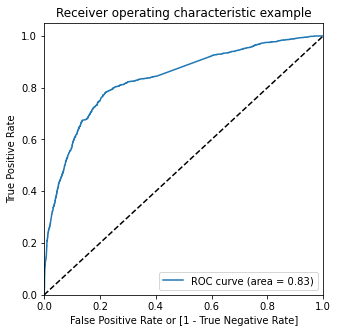

In [134]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### ROC Curve should be close to 1

## Step 6] Finding Optimal Cutoff

In [135]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Index,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.335270,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.127864,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.223907,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.707658,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.189243,3934,0,1,1,0,0,0,0,0,0,0,0


In [136]:
from sklearn.metrics import confusion_matrix

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.460575  0.984590  0.137681
0.2   0.2  0.706865  0.838200  0.625937
0.3   0.3  0.779375  0.784672  0.776112
0.4   0.4  0.785096  0.714517  0.828586
0.5   0.5  0.786487  0.636253  0.879060
0.6   0.6  0.772573  0.545418  0.912544
0.7   0.7  0.749227  0.425385  0.948776
0.8   0.8  0.720470  0.312652  0.971764
0.9   0.9  0.684601  0.187753  0.990755


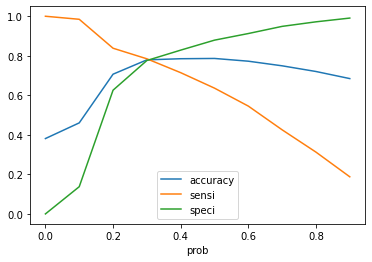

In [137]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### - From the above graph, 0.3 is the optimum point to consider as a cutoff

In [138]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Index,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.335270,1871,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.127864,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.223907,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.707658,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.189243,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [139]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final=y_train_pred_final[['Converted','Converted_prob','Index','final_Predicted','Lead_Score']]
y_train_pred_final.head()

,Converted,Converted_prob,Index,final_Predicted,Lead_Score
0,0,0.335270,1871,1,34
1,0,0.127864,6795,0,13
2,0,0.223907,3516,0,22
3,0,0.707658,8105,1,71
4,0,0.189243,3934,0,19


#### - Overall Accuracy

In [140]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7793753865182437

In [141]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3106,  896],
       [ 531, 1935]], dtype=int64)

In [142]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [143]:
print(f"Sensitivity: {TP/float(TP+FN)}")
print(f"Specificity: {TN/float(TN+FP)}")
print(f"False Positive Rate: {FP/float(TN+FP)}")
print(f"Positive Predictive value: {TP/float(TP+FP)}")
print(f"Negative Predictive value: {TN/float(TN+ FN)}")
print(f"Precision: {TP/(TP+FP)}")
print(f"Recall: {TP/(TP+FN)}")

Sensitivity: 0.7846715328467153
Specificity: 0.776111944027986
False Positive Rate: 0.223888055972014
Positive Predictive value: 0.683504062168845
Negative Predictive value: 0.8540005499037668
Precision: 0.683504062168845
Recall: 0.7846715328467153


In [144]:
from sklearn.metrics import precision_recall_curve

In [145]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

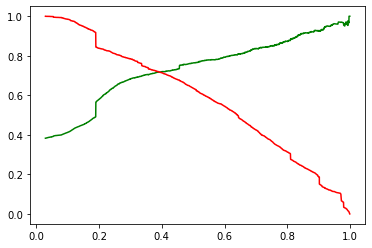

In [146]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Test Set

In [147]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [148]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Business,Specialization_Industry,Specialization_Management,What is your current occupation_Working Professional
4269,0,0.964504,0,1,0,0,0,0,0,0
2376,0,-0.885371,1,0,0,0,0,0,0,0
7766,0,-0.777416,0,0,0,0,0,0,1,1
9199,0,-0.885371,0,0,1,0,0,0,0,0
4359,0,-0.885371,1,0,0,0,0,0,1,0


In [149]:
X_test_sm = sm.add_constant(X_test)

#### - Predict on Test Set

In [150]:
y_test_pred = res.predict(X_test_sm)

In [151]:
y_test_pred[:10]

4269    0.294732
2376    0.809865
7766    0.431531
9199    0.189243
4359    0.901998
9186    0.413058
1631    0.587582
8963    0.129458
8007    0.272228
5324    0.205681
dtype: float64

In [152]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.294732
2376,0.809865
7766,0.431531
9199,0.189243
4359,0.901998


In [153]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Index'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [154]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Index,0
0,1,4269,0.294732
1,1,2376,0.809865
2,1,7766,0.431531
3,0,9199,0.189243
4,1,4359,0.901998


In [155]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Index,Converted_prob
0,1,4269,0.294732
1,1,2376,0.809865
2,1,7766,0.431531
3,0,9199,0.189243
4,1,4359,0.901998


In [156]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,Index,Converted_prob,Lead_Score
0,1,4269,0.294732,29
1,1,2376,0.809865,81
2,1,7766,0.431531,43
3,0,9199,0.189243,19
4,1,4359,0.901998,90


In [157]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,Index,Converted_prob,Lead_Score,final_Predicted
0,1,4269,0.294732,29,0
1,1,2376,0.809865,81,1
2,1,7766,0.431531,43,1
3,0,9199,0.189243,19,0
4,1,4359,0.901998,90,1


In [158]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7738095238095238

In [159]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion3

array([[1295,  382],
       [ 245,  850]], dtype=int64)

In [160]:
TP = confusion3[1,1] 
TN = confusion3[0,0] 
FP = confusion3[0,1] 
FN = confusion3[1,0] 

In [161]:
print(f"Sensitivity: {TP/float(TP+FN)}")
print(f"Specificity: {TN/float(TN+FP)}")
print(f"False Positive Rate: {FP/float(TN+FP)}")
print(f"Positive Predictive value: {TP/float(TP+FP)}")
print(f"Negative Predictive value: {TN/float(TN+ FN)}")
print(f"Precision: {TP/(TP+FP)}")
print(f"Recall: {TP/(TP+FN)}")

Sensitivity: 0.776255707762557
Specificity: 0.7722122838401908
False Positive Rate: 0.2277877161598092
Positive Predictive value: 0.689935064935065
Negative Predictive value: 0.8409090909090909
Precision: 0.689935064935065
Recall: 0.776255707762557


## - Merging the Dataset to Map the Lead Number with Lead Score

In [162]:
df["Index"] = df.index
df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business,Specialization_Industry,Specialization_Management,How did you hear about X Education_Answered,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Non-Mumbai-Maharashtra,Index
0,660737,0,0,0.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,660728,0,0,5.0,674,2.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,660727,0,1,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2
3,660719,0,0,1.0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,3
4,660681,0,1,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,4


In [163]:
merged_train = pd.merge(y_train_pred_final, df, how='left', on=["Index"])

In [164]:
merged_train.columns

Index(['Converted_x', 'Converted_prob', 'Index', 'final_Predicted',
       'Lead_Score', 'Lead Number', 'Do Not Email', 'Converted_y',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Business', 'Specialization_Industry',
       'Specialization_Management',
       'How did you hear about X Education_Answered',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'City_Mumbai',
       'City_Non-Mumbai-Maharashtra'],
      dtype='object')

In [165]:
merged_train = merged_train[['Lead Number','Converted_x','final_Predicted','Converted_prob','Lead_Score']]

In [166]:
merged_train = merged_train.rename(columns = {'Converted_x':'Converted Actual','final_Predicted':'Converted Predicted',
                     'Converted_prob':'Converted Probability','Lead_Score':'Lead Score'})

In [167]:
merged_test = pd.merge(y_pred_final, df, how='left', on=["Index"])

In [168]:
merged_test.columns

Index(['Converted_x', 'Index', 'Converted_prob', 'Lead_Score',
       'final_Predicted', 'Lead Number', 'Do Not Email', 'Converted_y',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Business', 'Specialization_Industry',
       'Specialization_Management',
       'How did you hear about X Education_Answered',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'City_Mumbai',
       'City_Non-Mumbai-Maharashtra'],
      dtype='object')

In [169]:
merged_test = merged_test[['Lead Number','Converted_x','final_Predicted','Converted_prob','Lead_Score']]

In [170]:
merged_test = merged_test.rename(columns = {'Converted_x':'Converted Actual','final_Predicted':'Converted Predicted',
                     'Converted_prob':'Converted Probability','Lead_Score':'Lead Score'})

In [171]:
merged_train

,Lead Number,Converted Actual,Converted Predicted,Converted Probability,Lead Score
0,641410,0,1,0.335270,34
1,597687,0,0,0.127864,13
2,626825,0,0,0.223907,22
3,587928,0,1,0.707658,71
4,622366,0,0,0.189243,19
...,...,...,...,...,...
6463,656685,1,1,0.901998,90
6464,659710,1,1,0.992655,99
6465,588165,1,0,0.189243,19
6466,596447,0,0,0.249935,25


In [172]:
merged_test

,Lead Number,Converted Actual,Converted Predicted,Converted Probability,Lead Score
0,619003,1,0,0.294732,29
1,636884,1,1,0.809865,81
2,590281,1,1,0.431531,43
3,579892,0,0,0.189243,19
4,617929,1,1,0.901998,90
...,...,...,...,...,...
2767,583730,0,0,0.176058,18
2768,639134,1,1,0.809865,81
2769,595041,0,0,0.189243,19
2770,608916,0,1,0.444415,44


## - Overall Inference

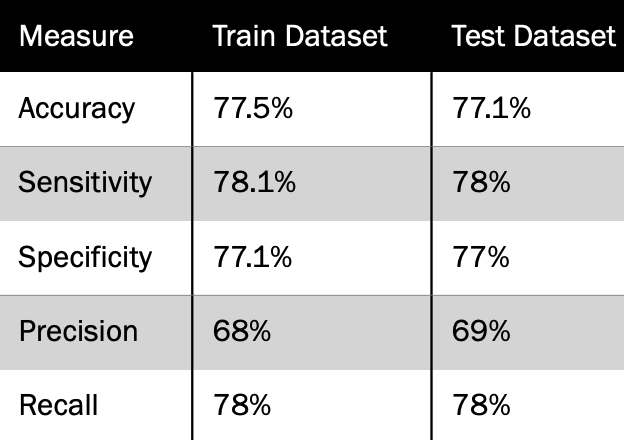

## Final Model


In [173]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3084.7
Date:                Wed, 11 Aug 2021   Deviance:                       6169.5
Time:                        09:48:36   Pearson chi2:                 6.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Attributes contributing to the final model are
1]  `Do Not Email`: Leads that are specifically asking not to be mailed are the ones that tend to convert less  <br> 
2]  `Total Time Spent on Website`:The more time lead is spending signifies the more interested they are in taking up the course <br>
3]  `Lead Origin_Lead Add Form`: Leads that are originated from the Lead Add Form tend to convert more when compared to another source of origin <br>
4]  `Lead Source_Direct Traffic`: Leads from direct traffic have a very low probability of conversion <br>
5]  `Lead Source_Olark Chat`: Prospects approaching X Education via Olark Chat have high chances of conversion <br>
6]  `Lead Source_Welingak Website`: Leads that are sourced from the Welingak website have a 98% chance of conversion <br>
7]  `Specialization_Business`: Choosing a specialization is better than not choosing any. Also, Business courses have less probability of conversion when compared to Management and Industry related courses<br>
8]  `Specialization_Industry`: Choosing a specialization is better than not choosing any. Also, leads opting for Industry related courses have high chance of conversion <br>
9]  `Specialization_Management`: Choosing a specialization is better than not choosing any. Also, leads opting for Management related courses have high chance of conversion when compared to Business but less when compared to Industry<br>
10] `What is your current occupation_Working Professional`: Working Professionals generally tend to convert more than students, housewives, etc. 